In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def times100(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return 100 * x
    # and leave everything else
    else:
        return
def round_up(x):
    return round(x,4)

In [3]:
df = pd.read_excel('CNN_Output.xlsx')

In [4]:
df = df.applymap(round_up)
df = df.applymap(times100)

In [5]:
df

,Precision,Recall,F1_Score,Accuracy
0,49.21,58.74,53.55,61.00
1,48.99,45.98,47.44,58.77
2,50.00,46.77,48.33,59.65


In [6]:
cell_text = [df[i].values for i in df.keys()]

In [7]:
cell_text

[array([ 49.21,  48.99,  50.  ]),
 array([ 58.74,  45.98,  46.77]),
 array([ 53.55,  47.44,  48.33]),
 array([ 61.  ,  58.77,  59.65])]

In [8]:
cell_text_per = []
cell_text_per.append(list(map("{}%".format, cell_text[0])))
cell_text_per.append(list(map("{}%".format, cell_text[1])))
cell_text_per.append(list(map("{}%".format, cell_text[2])))
cell_text_per.append(list(map("{}%".format, cell_text[3])))

In [9]:
cell_text_per

[['49.21%', '48.99%', '50.0%'],
 ['58.74%', '45.98%', '46.77%'],
 ['53.55%', '47.44%', '48.33%'],
 ['61.0%', '58.77%', '59.65%']]

In [10]:
cell_text_per[0][2] = '50.00%'
cell_text_per[3][0] = '61.00%'


cell_text_per

[['49.21%', '48.99%', '50.00%'],
 ['58.74%', '45.98%', '46.77%'],
 ['53.55%', '47.44%', '48.33%'],
 ['61.00%', '58.77%', '59.65%']]

/Users/wonhyukjang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


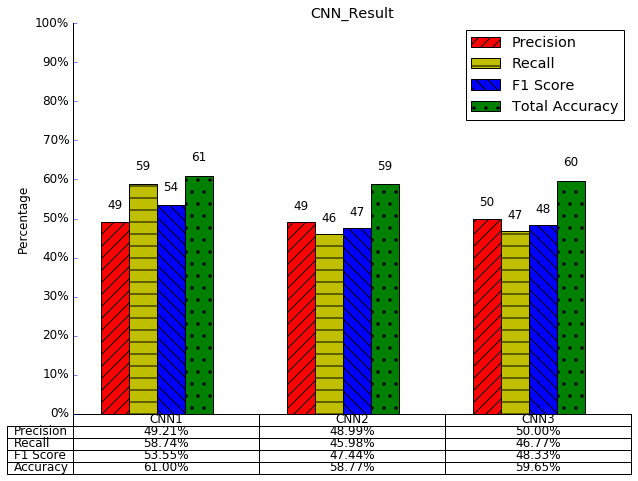

In [11]:
from matplotlib import rc
import matplotlib as mpl

rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})

N = 3
precision = df.Precision.values
recall = df.Recall.values
f1 = df.F1_Score.values
accuracy = df.Accuracy.values

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))

rects1 = ax.bar(ind + width, precision, width, color='r',hatch='//')

rects2 = ax.bar(ind + 2*width, recall, width, color='y',hatch='-')

rects3 = ax.bar(ind + 3*width, f1, width, color='b',hatch='\\\\')

rects4 = ax.bar(ind + 4*width, accuracy, width, color='g',hatch='.')

# add some text for labels, title and axes ticks
# ax.set_axis_bgcolor('white')

# ax.set_xticks(ind + width * 3)
y_tick = np.arange(0,110,10)
y_percentage = ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
ax.set_yticks(y_tick)
# plt.setp(ax, yticks=y_tick)


ax.set_yticklabels(y_percentage)

ax.legend((rects1[0], rects2[0],rects3[0],rects4[0]), ('Precision', 'Recall','F1 Score','Total Accuracy'),loc = 1)

ax.tick_params(axis='y', which='both', color='b')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % round(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

autolabel(rects4)

rows = ['Precision','Recall','F1 Score','Accuracy']
columns = ['CNN1', 'CNN2', 'CNN3']
the_table = plt.table(cellText=cell_text_per,
                      rowLabels=rows,
                      cellLoc='center',
                      colLabels=columns,
                      loc='bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xticks([])
    
plt.ylim([0.0, 100.0])
plt.ylabel('Percentage')
plt.title('CNN_Result')
# plt.show()
plt.savefig("cnn_Barplot.png")